In [1]:
# import
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

## Load Data

In [2]:
columns = ['area','perimeter','compactness','length','width','asymmetry','groove','class']
df = pd.read_csv("seeds_dataset.txt", delimiter='\s+', names=columns)
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Preprocessing Data

In [3]:
scalar = StandardScaler()
X_std = scalar.fit_transform(df[columns[:-1]])
labels = df['class']

## K-Means --- Agglomerative Clustering

In [4]:
indexes = [i for i in range(6,13)]
table1 = pd.DataFrame(data=np.zeros((len(indexes), 1)), columns=['Accuracy'])
table1.index = indexes
table1.index.name = "clusters"
table1

,Accuracy
clusters,
6,0.0
7,0.0
8,0.0
9,0.0
10,0.0
11,0.0
12,0.0


In [5]:
for c in range(6,13):
    clt = AgglomerativeClustering(n_clusters=c, linkage='ward')
    # Fit & Predict
    clt.fit_predict(X_std)
    # Labels
    clusters = clt.labels_
    
    # Compute mode
    moda = -1 + np.zeros(c).astype(int)
    aciertos = 0
    
    for k in range(c):
        moda[k] = np.bincount(labels[clusters==k]).argmax()
        aciertos += np.sum(labels[clusters==k] == moda[k])
        
    accu = aciertos/labels.shape[0]
    
    table1.loc[c] = accu
    
table1

,Accuracy
clusters,
6,0.928571
7,0.928571
8,0.928571
9,0.928571
10,0.928571
11,0.928571
12,0.928571


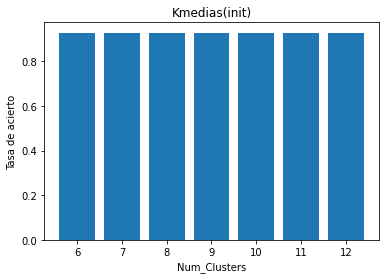

In [6]:
plt.figure()
plt.title("Kmedias(init)")
plt.bar(indexes,table1['Accuracy'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

## K-Menoides con Variante PAM

In [7]:
from sklearn_extra.cluster import KMedoids

indexes = [i for i in range(1,13)]
table2 = pd.DataFrame(data=np.zeros((len(indexes), 1)), columns=['Accuracy'])
table2.index = indexes
table2.index.name = "clusters"
table2

,Accuracy
clusters,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [8]:
for c in range(1,13):
    # Aplicamos el metodo por defecto que es el 'alternate' porque con el 'pam' da un error. En principio, es porque al hacer
    # el fit debemos pasarle las distanticas en lugar de las instancias.
    kmenoids = KMedoids(n_clusters=c)
    # Train
    kmenoids.fit(X_std)
    # Labels
    clusters = kmenoids.labels_
    
    # Compute mode
    moda = -1 + np.zeros(c).astype(int)
    aciertos = 0
    
    for k in range(c):
        moda[k] = np.bincount(labels[clusters==k]).argmax()
        aciertos += np.sum(labels[clusters==k] == moda[k])
        
    accu = aciertos/labels.shape[0]
    
    table2.loc[c] = accu
    
table2

,Accuracy
clusters,
1,0.333333
2,0.666667
3,0.895238
4,0.904762
5,0.890476
6,0.895238
7,0.904762
8,0.885714
9,0.880952


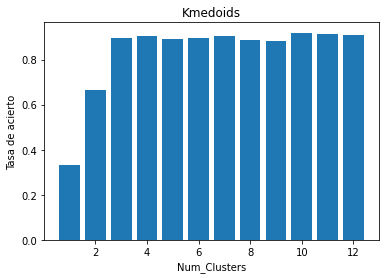

In [9]:
plt.figure()
plt.title("Kmedoids")
plt.bar(indexes,table2['Accuracy'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

## DBSCAN
El algoritmo precisa de **eps** (el cual si es muy grande generara un numero de clusters pequeño) y del numero de puntos densamente conectados para formar un cluster (**min_sample**)

In [10]:
dbs = DBSCAN(eps=0.8, min_samples=2).fit(X_std)
clusters = dbs.labels_

In [11]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  2,  0,  0,  2, -1,
        0, -1,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  1, -1, -1,  0, -1,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  3,  0,  0,  0,
        0,  0,  4,  4,  4,  5,  4,  4,  4,  6, -1, -1,  4,  7,  8,  5,  5,
        5,  5, -1,  9,  9,  5,  5,  5,  7, -1,  4,  5, -1, -1,  5,  4,  5,
        5,  5,  5,  5,  5,  4,  5,  5,  5,  5,  5, -1,  6,  5,  5,  5,  5,
        5,  8,  4,  4,  5,  0,  5,  4,  5,  5, -1,  5,  5,  4,  4,  4,  0,
        4, 10, 10,  4,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,
        0,  0,  0, 11,  0,  0], dtype=int64)

Las etiquetas marcadas con -1 se corresponden con valores aislados, por lo que procedemos a eliminarlos

#### Get List of Index with value = -1

In [12]:
delete = (clusters == -1).nonzero()
delete[0]

array([  8,  16,  18,  30,  36,  37,  39,  51,  59,  60,  61,  78,  79,
        87,  94,  97,  98, 113, 129, 146, 179, 188], dtype=int64)

In [13]:
# Convert numpy.ndarray to list
borrar = delete[0].tolist()

In [14]:
# Number of elements to delete
len(borrar)

22

In [15]:
# Delete these index from X DataFrame
df = df[~df.index.isin(borrar)]
df

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [16]:
# Delete these index from original labels
labels = labels[~labels.index.isin(borrar)]
labels.shape

(188,)

#### Normalizamos de nuevo debido a que eliminamos los puntos aislados

In [17]:
X_std_new = StandardScaler().fit_transform(df[columns[:-1]])
X_std_new

array([[ 0.16413797,  0.23982814,  0.01862149, ...,  0.16119535,
        -1.02911695, -0.38978932],
       [ 0.03325264,  0.0307303 ,  0.44669028, ...,  0.21623766,
        -1.86014715, -0.95490071],
       [-0.16996405, -0.34099921,  1.45964514, ...,  0.22672191,
        -0.69891542, -1.23531583],
       ...,
       [-0.54539827, -0.67400689,  0.75184823, ..., -0.04848966,
         3.18060712, -0.74084336],
       [-1.01382997, -1.0225033 , -0.78241813, ..., -1.08643042,
        -0.07788786, -0.76653024],
       [-0.85538983, -0.92182656, -0.09157444, ..., -0.72472379,
         1.33064961, -0.72585935]])

In [18]:
dbs.fit(X_std_new)

DBSCAN(eps=0.8, min_samples=2)

In [19]:
dbs.labels_

array([ 0,  0,  0,  0,  1,  0,  0,  0,  2, -1,  0,  3,  0,  0,  3,  1,  0,
        0,  0,  1,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  4,  0,  0,  0,  0,  0,  5,  5,  5,  6,  5,  5,  5,  7,  5,
        8,  9,  6,  6,  6,  6, 10, 10,  6,  6,  6,  8,  5,  6,  6,  5,  6,
        6,  6,  6,  6,  6,  5,  6,  6,  6,  6,  6,  7,  6,  6,  6,  6,  6,
        9,  5,  5,  6, -1,  6,  5,  6,  6,  6,  6,  5,  5,  5,  0,  5, 11,
       11,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0, 12,  0,
        0], dtype=int64)

In [20]:
np.unique(dbs.labels_) # Tenemos 13 clusters

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [21]:
# Compute dataframe with Accuracy
n_clusters = len(np.unique(dbs.labels_))-1
table3 = pd.DataFrame(data=np.zeros((n_clusters,1)), columns=['Accuracy'])
indexes = [i for i in range(1,n_clusters+1)]
table3.index = indexes
table3.index.name = 'Clusters'
table3

,Accuracy
Clusters,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [22]:
for c in range(1, n_clusters+1):
    dbs = DBSCAN(eps=0.8, min_samples=2)
    
    #Train
    dbs.fit(X_std_new)
    
    clusters = dbs.labels_
    
    # Compute mode
    moda = -1 + np.zeros(c).astype(int)
    aciertos = 0
    
    for k in range(c):
        moda[k] = np.bincount(labels[clusters==k]).argmax()
        aciertos += np.sum(labels[clusters==k] == moda[k])
        
    accu = aciertos/labels.shape[0]
    
    table3.loc[c] = accu
    
table3

,Accuracy
Clusters,
1,0.340426
2,0.361702
3,0.372340
4,0.382979
5,0.393617
6,0.489362
7,0.659574
8,0.670213
9,0.680851


In [24]:
table3['Accuracy'].mean()

0.5523731587561375

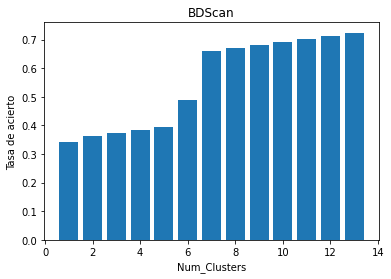

In [23]:
plt.figure()
plt.title("BDScan")
plt.bar(indexes,table3['Accuracy'])
plt.xlabel("Num_Clusters")
plt.ylabel("Tasa de acierto")
plt.show()